In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df_players = pd.read_excel('players.xlsx')

In [2]:
df_players

,Unnamed: 0,Name,Country,Current Rating,Potential Rating,Height (cm),Weight (kg),Preferred Foot,Birth Date,Age,Preferred Positions,Player Work Rate,Weak Foot,Skill Moves,Value (€),Wage (€),Team,Position,Kit Number,On loan from,Joined Club,Contract Length,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long Pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Specialities,Traits
0,0,Virgil van Dijk,Netherlands,91,92,193,92,Right,"July 8, 1991",29,CB,Medium / Medium,3,2,90000000,245000,Liverpool,LCB,4,No,"1, 2018",2023,77,70,93,86,93,83,89,47,90,65,90,53,79,83,74,75,92,53,79,61,90,87,81,52,64,60,70,62,45,11,13,10,13,11,"Tackling, Tactician, Strength, Complete Defender","Diver, Avoids Using Weaker Foot, Leadership, L..."
1,1,Kevin De Bruyne,Belgium,91,91,181,70,Right,"June 28, 1991",29,CAM CM,High / High,5,4,90000000,370000,Manchester City,RCM,17,No,"30, 2015",2023,91,87,68,53,62,76,91,88,63,94,91,94,92,91,77,89,74,76,76,78,63,55,91,82,90,85,83,82,82,10,15,13,5,13,"Dribbler, Playmaker, Engine, Distance Shooter,...","Power Free-Kick, Avoids Using Weaker Foot, Div..."
2,2,Alisson,Brazil,90,91,191,91,Right,"Oct. 2, 1992",27,GK,Medium / Medium,3,1,64500000,160000,Liverpool,GK,1,No,"19, 2018",2024,30,27,15,16,19,27,88,13,11,66,65,17,45,44,56,32,78,37,47,40,52,19,64,13,14,19,18,23,20,91,86,88,85,89,No,"Flair, Swerve Pass"
3,3,Mohamed Salah,Egypt,90,90,175,71,Left,"June 15, 1992",28,RW ST,High / Medium,3,4,80500000,235000,Liverpool,RW,11,No,"1, 2017",2023,89,90,38,41,43,63,92,91,55,84,90,79,84,75,94,85,75,91,92,91,69,59,80,90,84,83,69,81,79,11,14,14,9,14,"Speedster, Dribbler, Acrobat, Clinical Finishe...","Injury Free, Beat Offside Trap, Argues With Of..."
4,4,Sadio Mané,Senegal,90,90,175,69,Right,"April 10, 1992",28,LW,High / Medium,4,4,80500000,235000,Liverpool,LW,10,No,"1, 2016",2023,89,91,42,38,42,75,93,92,35,85,84,76,85,71,95,88,70,86,93,93,86,84,84,90,78,76,64,71,75,7,10,10,15,14,"Speedster, Dribbler, Acrobat","Selfish, Early Crosser"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,Jordan Davies,Wales,52,61,168,64,Left,"Aug. 18, 1998",21,LM CM,Medium / Medium,2,2,80000,4600,Brighton & Hove Albion,Res,52,No,"9, 2017",2020,52,55,40,52,53,61,51,46,51,38,45,51,50,44,71,52,47,83,67,68,60,45,45,34,39,29,25,41,31,10,12,12,13,6,No,No
656,656,Adam Parkes,England,52,66,185,75,Right,"Nov. 30, 1999",20,GK,Medium / Medium,1,1,90000,2400,Watford,Res,47,No,"23, 2019",2020,19,9,13,13,13,21,50,4,10,25,32,12,16,28,32,26,59,50,18,36,55,10,37,7,5,10,13,16,5,50,51,53,49,51,No,No
657,657,Aaron O'Driscoll,Republic of Ireland,52,67,187,65,Right,"April 4, 1999",21,CB CDM,Medium / Medium,3,2,100000,4500,Southampton,Res,50,No,"8, 2016",2020,52,44,46,49,52,61,48,31,45,43,42,39,55,51,53,49,61,69,53,62,55,49,49,29,25,38,37,35,34,5,12,12,14,12,No,No
658,658,Jake Young,England,51,65,186,77,Right,"July 22, 2001",19,ST,Medium / Medium,2,2,70000,1500,Sheffield United,Res,44,No,"2, 2019",2021,46,41,13,13,17,33,43,47,12,33,39,28,39,22,63,50,62,49,68,59,69,52,56,52,44,39,22,59,50,8,13,9,12,10,No,No


# **Introduction**

The English Premier League is the most popular and interesting championship in Europe for a very long time. The main reason for greatness is the unpredictability influenced by the number of strong teams. Even teams that are out of the "Big Six" (recently it was "Big Four") able to be competitive, confirmation of this is the tale about Leicester City at the season 2015-16. [<a href="https://www.youtube.com/watch?v=SkfTShRBJ68&ab_channel=VadymSklyarukPictures" target="_blank">THE LEICESTER DREAM - The Greatest Sporting Story Ever</a>].
<br> <br>
Every lover of this wonderful league tries to guess who will be the champion of the upcoming season. However, as I said previously it is almost impossible to predict who will win the championship because many factors that can not be used in calculations (e.g. probability of injuries of major players, the motivation of the team can't be expressed in numbers, and etc).
<br> <br>
But one the most important factor on the way to a victory that can be calculated and compared between teams is physical preparation.

#### **Research Question**
Which team of the English Premier League is the best physically prepared for the season 2020-21?
- The targer population of interest is 20 teams of EPL. 
- The research question is descriptive.
- Didn't see the research question such as that before.
- All necessary variables are expressed in numbers and feasible to measure using python.
</br> **P.S. By "best" I mean the highest means of the variables**.

#### **How was data collected?**
Nowadays the football simulators have great data about players so data was collected from the "<a href="https://www.fifaindex.com/players/fifa21/?league=13&order_by=overallrating&order=desc" target="_blank">Players Stats Database - FIFA 21</a>" site by BeatifulSoup in python.

#### **Sampling Design**
Since my data is an entire **population** there is no sampling design.

#### **What are the variables?**
To answer this research question I need variables: "Team", "Position", "Acceleration", "Stamina", "Strength", "Balance", "Sprint Speed", "Agility", and "Jumping".

# **Data Analysis**

We focus on only needed variables. There are: "Team", "Position", "Acceleration", "Stamina", "Strength", "Balance", "Sprint Speed", "Agility", and "Jumping". We, also, won't consider players who are from reserve.

In [3]:
df_data = df_players[["Team", "Position", "Acceleration", "Stamina", "Strength", "Balance", "Sprint Speed", "Agility", "Jumping"]][df_players["Position"] != "Res"]

df_data

,Team,Position,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping
0,Liverpool,LCB,74,75,92,53,79,61,90
1,Manchester City,RCM,77,89,74,76,76,78,63
2,Liverpool,GK,56,32,78,37,47,40,52
3,Liverpool,RW,94,85,75,91,92,91,69
4,Liverpool,LW,95,88,70,86,93,93,86
...,...,...,...,...,...,...,...,...,...
562,Brighton & Hove Albion,Sub,85,55,47,59,77,77,59
569,Wolverhampton Wanderers,Sub,76,54,51,75,77,76,53
582,Southampton,Sub,67,48,55,74,63,72,50
622,Burnley,Sub,60,53,48,70,60,62,57


#### **Number of players in each team**

Rotation is one of the physical preparedness factors. It tells us about how the team is ready to keep a high pace during the whole match by substitutions. Therefore, team size shows opportunities for rotation.

In [4]:
dict_count_data = {"Team": [], "Count": []}

for team in df_data.Team.unique():
  dict_count_data["Team"] += [team]
  dict_count_data["Count"] += [df_data[df_data.Team == team].shape[0]]

df_count_data = pd.DataFrame(dict_count_data)
df_count_data

,Team,Count
0,Liverpool,23
1,Manchester City,23
2,Chelsea,23
3,Tottenham Hotspur,24
4,Manchester United,23
5,Arsenal,23
6,Leicester City,23
7,Wolverhampton Wanderers,23
8,Everton,23
9,Crystal Palace,23


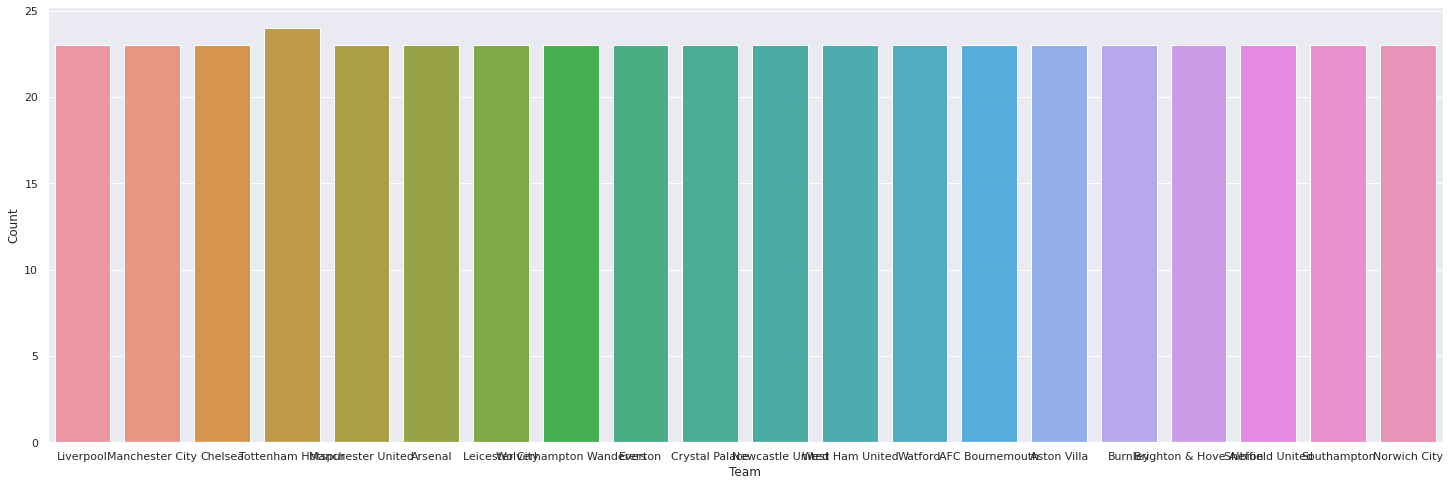

In [5]:
plt.figure(figsize = (25, 8))
sns.barplot(x = "Team", y = "Count", data = df_count_data)
plt.show()

From the barplot above we see that almost every team has the same number of players (23).  Exception is "Tottenham Hotspur" (24).

#### **Mean variables of teams**

For convenient analysis, we need to consider teams with strong index variables.

In [6]:
dict_mean_data = {"Team": [], "Acceleration": [], "Stamina": [], "Strength": [], "Balance": [],
                  "Sprint Speed": [], "Agility": [], "Jumping": []}

for team in df_data.Team.unique():
  dict_mean_data["Team"] += [team]
  for variable in df_data.iloc[:, 2:].columns:
    dict_mean_data[variable] += [round(df_data[df_data["Team"] == team][variable].mean(), 2)]

df_mean_data = pd.DataFrame(dict_mean_data)
df_mean_data

,Team,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping
0,Liverpool,73.17,74.48,71.00,70.43,73.13,71.43,69.87
1,Manchester City,72.70,72.78,68.78,73.39,72.17,73.65,70.26
2,Chelsea,69.04,69.52,68.43,67.52,68.70,69.83,68.87
3,Tottenham Hotspur,72.42,73.67,71.29,69.67,74.12,70.83,72.25
4,Manchester United,73.00,73.48,70.22,68.22,74.61,73.35,70.52
5,Arsenal,72.83,72.43,71.17,68.13,73.43,70.26,65.13
6,Leicester City,67.22,68.35,67.43,67.13,67.00,66.17,68.83
7,Wolverhampton Wanderers,68.74,68.61,65.43,68.30,70.22,68.57,66.52
8,Everton,67.39,69.96,69.83,66.52,68.91,67.43,69.39
9,Crystal Palace,60.48,63.78,72.43,61.61,61.22,64.04,67.65


In [7]:
df_mean_data.describe()

,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,67.957000,69.223000,69.285500,66.883000,68.360500,67.971500,68.835500
std,3.416291,2.873688,1.953907,2.610459,3.673413,2.798442,2.486891
min,60.480000,63.780000,65.430000,61.610000,61.220000,63.570000,63.700000
25%,65.775000,67.600000,67.827500,65.260000,66.437500,66.170000,67.542500
50%,67.325000,68.480000,69.520000,67.130000,67.915000,67.300000,68.850000
75%,69.885000,70.577500,70.572500,68.152500,70.707500,69.937500,69.967500
max,73.170000,74.480000,72.740000,73.390000,74.610000,73.650000,74.480000


The team won't be considered if one of its variables is less than the median of the distribution of the corresponding variable.

In [8]:
median_of_means_data = df_mean_data.describe().loc["50%", :]

df_results_data = df_mean_data[(df_mean_data["Acceleration"] >= median_of_means_data["Acceleration"]) & (df_mean_data["Stamina"] >= median_of_means_data["Stamina"]) &
                               (df_mean_data["Strength"] >= median_of_means_data["Strength"]) & (df_mean_data["Balance"] >= median_of_means_data["Balance"]) &
                               (df_mean_data["Sprint Speed"] >= median_of_means_data["Sprint Speed"]) & (df_mean_data["Agility"] >= median_of_means_data["Agility"]) &
                               (df_mean_data["Jumping"] >= median_of_means_data["Jumping"])]

df_results_data

,Team,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping
0,Liverpool,73.17,74.48,71.00,70.43,73.13,71.43,69.87
3,Tottenham Hotspur,72.42,73.67,71.29,69.67,74.12,70.83,72.25
4,Manchester United,73.00,73.48,70.22,68.22,74.61,73.35,70.52


In the table above we can see the teams (all players) with strong indexes in physical preparedness variables.

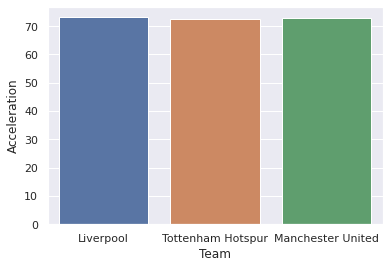

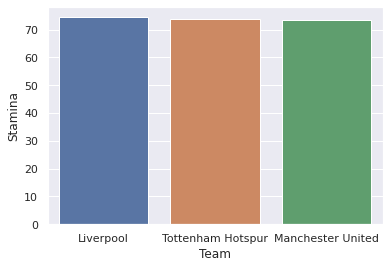

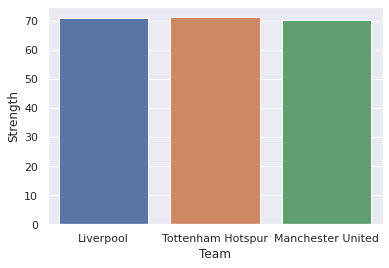

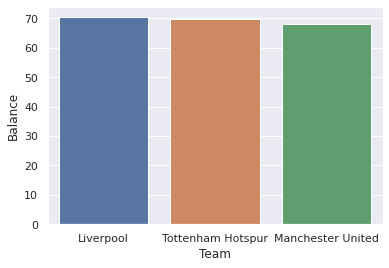

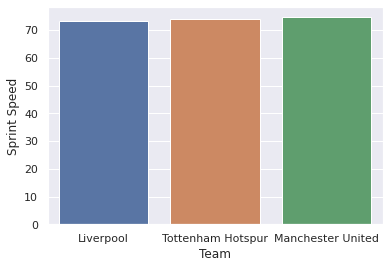

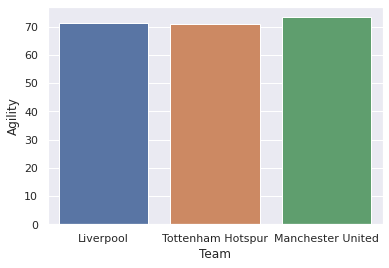

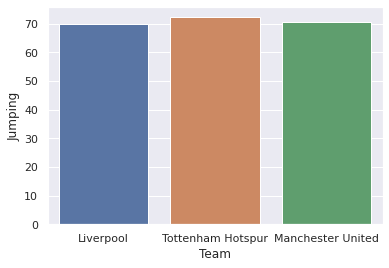

In [9]:
for variable in df_results_data.columns[1:]:
  plt.figure()
  sns.barplot(x = "Team", y = variable, data = df_results_data)
  plt.show()

The above barplots are not informative because values are pretty close to each other.

#### **Starting line-ups of teams**

As we know that the mean is sensitive to "outliers" and so are "Sub" footballers who play rarely because of fewer skills and also preparedness. Here, we analyze the starting line-up of the team.

In [10]:
df_main = df_data[(df_data["Position"] != "Sub")]

df_main

,Team,Position,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping
0,Liverpool,LCB,74,75,92,53,79,61,90
1,Manchester City,RCM,77,89,74,76,76,78,63
2,Liverpool,GK,56,32,78,37,47,40,52
3,Liverpool,RW,94,85,75,91,92,91,69
4,Liverpool,LW,95,88,70,86,93,93,86
...,...,...,...,...,...,...,...,...,...
425,Burnley,RB,53,66,67,61,49,55,72
435,Norwich City,LCB,53,50,80,51,49,48,82
438,Norwich City,RDM,59,68,79,74,65,65,74
514,West Ham United,RB,75,65,60,73,73,60,68


#### **Number of starting line-up players in each team**

In [11]:
dict_count_main = {"Team": [], "Count": []}

for team in df_main.Team.unique():
  dict_count_main["Team"] += [team]
  dict_count_main["Count"] += [df_main[df_main.Team == team].shape[0]]

df_count_main = pd.DataFrame(dict_count_main)
df_count_main

,Team,Count
0,Liverpool,11
1,Manchester City,11
2,Chelsea,11
3,Manchester United,11
4,Arsenal,11
5,Tottenham Hotspur,12
6,Leicester City,11
7,Wolverhampton Wanderers,11
8,Everton,11
9,Crystal Palace,11


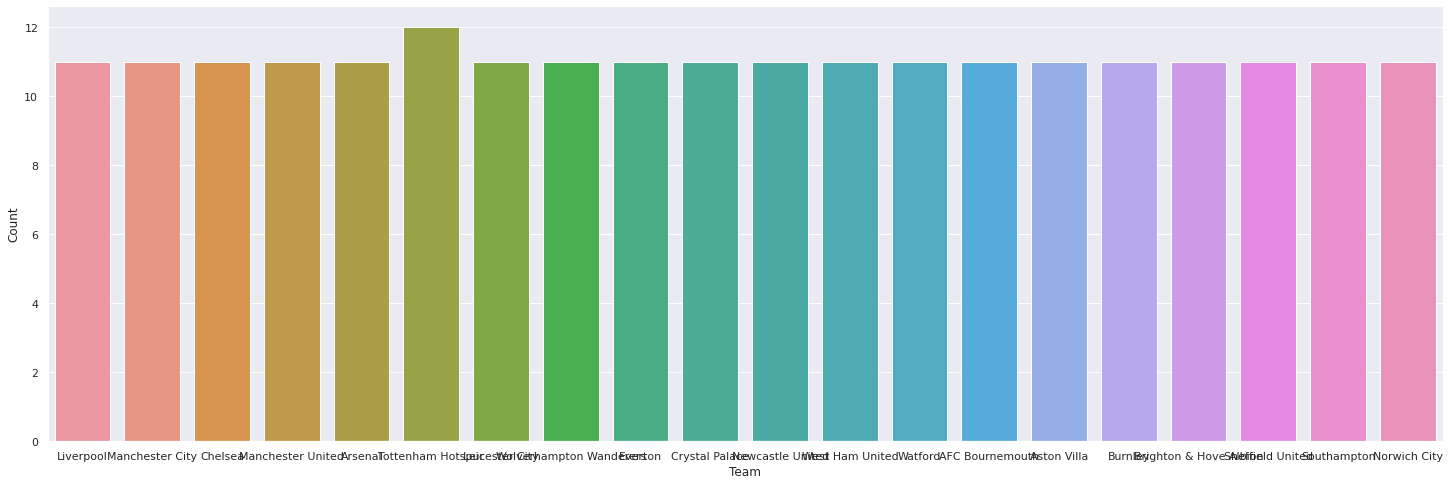

In [12]:
plt.figure(figsize = (25, 8))
sns.barplot(x = "Team", y = "Count", data = df_count_main)
plt.show()

From the barplot above we see that almost every team has the same number of starting line-up players (11).  Exception is "Tottenham Hotspur" (12).
<br><br>
If the number of players on the field is greater than 11 it conflicts the rules of football. Therefore there is a mistake in this data or 12 footballers play very often that we can say the starting line-up is that amount.

#### **Mean variable (of starting line-up players) of each team**

In [13]:
dict_mean_main = {"Team": [], "Acceleration": [], "Stamina": [], "Strength": [], "Balance": [],
              "Sprint Speed": [], "Agility": [], "Jumping": []}

for team in df_main.Team.unique():
  dict_mean_main["Team"] += [team]
  for variable in df_main.iloc[:, 2:].columns:
    dict_mean_main[variable] += [round(df_main[df_main["Team"] == team][variable].mean(), 2)]

df_mean_main = pd.DataFrame(dict_mean_main)
df_mean_main

,Team,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping
0,Liverpool,77.09,81.45,75.45,71.82,77.64,73.09,73.18
1,Manchester City,76.09,76.27,69.82,76.09,74.36,75.91,70.91
2,Chelsea,65.55,73.36,70.27,66.18,64.64,68.36,68.09
3,Manchester United,73.27,74.91,70.09,67.73,74.91,72.45,70.27
4,Arsenal,72.27,72.18,69.18,69.73,72.45,72.36,63.36
5,Tottenham Hotspur,74.92,75.92,68.67,73.50,75.83,73.67,72.25
6,Leicester City,72.64,74.45,66.18,69.73,72.64,70.91,71.45
7,Wolverhampton Wanderers,67.55,76.09,73.64,69.09,69.36,68.73,73.91
8,Everton,69.09,74.27,73.45,64.36,71.73,68.18,72.82
9,Crystal Palace,60.18,70.27,75.27,60.73,63.64,65.27,72.18


The team won't be considered if one of its variables is less than the median of distribution the corresponding variable.

In [14]:
median_of_means_main = df_mean_main.describe().loc["50%", :]

df_mean_main[(df_mean_main["Acceleration"] >= median_of_means_main["Acceleration"]) & (df_mean_main["Stamina"] >= median_of_means_main["Stamina"]) &
             (df_mean_main["Strength"] >= median_of_means_main["Strength"]) & (df_mean_main["Balance"] >= median_of_means_main["Balance"]) &
             (df_mean_main["Sprint Speed"] >= median_of_means_main["Sprint Speed"]) & (df_mean_main["Agility"] >= median_of_means_main["Agility"]) &
             (df_mean_main["Jumping"] >= median_of_means_main["Jumping"])]

,Team,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping
0,Liverpool,77.09,81.45,75.45,71.82,77.64,73.09,73.18


In the table above we can see the team (staring line-up players) with strong indexes in each physical preparedness variable.

# **Discussion**

The difficulty in this project was to compare teams within 7 variables to define the best-prepared (highest means) one because of the possibility that the team with the strongest "Stamina" variable can have not the best "Acceleration" variable. In this case, I decided to eliminate teams with non-strong mean variables and consider remainder ones. Maybe there exists an "Index" that captures all variables and it would be easier and more precise to answer this research question.

# **Conclusion**

The research question was to define the best-prepared (highest means) team of EPL for the season 2020/21.
<br><br>
From the analysis, we obtain that Liverpool is one of the teams that have the highest mean physical preparedness variables for starting line-up and "Sub" players, and it has the best mean variables among staring line-up players.
<br><br>
The results may be interesting for football lovers and FIFA gamers. Also, it would be useful to <a href="https://en.wikipedia.org/wiki/J%C3%BCrgen_Klopp" target="_blank">Jürgen Klopp</a> to keep his training methods and to some coaches of weak teams to pay attention to their physical preparedness.